In [1]:
# setup

from mlwpy import *
%matplotlib inline

iris = datasets.load_iris()

# standard iris dataset
tts = skms.train_test_split(iris.data, iris.target,
                            test_size=.33, random_state=21)

(iris_train_ftrs, iris_test_ftrs,
iris_train_tgt, iris_test_tgt) = tts

# one-class variation
useclass = 1
tts_1c = skms.train_test_split(iris.data, iris.target,
                               test_size=.33, random_state=21)

(iris_1c_train_ftrs, iris_1c_test_ftrs,
iris_1c_train_tgt, iris_1c_test_tgt) = tts_1c



### 8.2.1 Tree-Building Algorithms

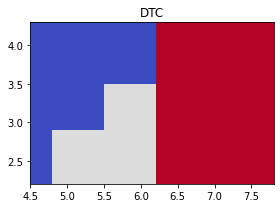

In [2]:
tree_classifiers = {
    'DTC' : tree.DecisionTreeClassifier(max_depth=3)
}

fig, ax = plt.subplots(1, 1, figsize=(4,3))
for name, mod in tree_classifiers.items():
    #plot_boundary only uses specified columns
    #[0,1] [sepal len/width] to predict and graph
    plot_boundary(ax, iris.data, iris.target, mod, [0,1])
    ax.set_title(name)
    
plt.tight_layout()

### 8.2.2 Decison Tree

In [3]:
dtc = tree.DecisionTreeClassifier()
skms.cross_val_score(dtc, 
                     iris.data, iris.target,
                     cv=3, scoring='accuracy')

array([0.98, 0.94, 0.98])

In [4]:
iris_1c_tree = (tree.DecisionTreeClassifier()
                    .fit(iris_1c_train_ftrs, iris_1c_train_tgt))

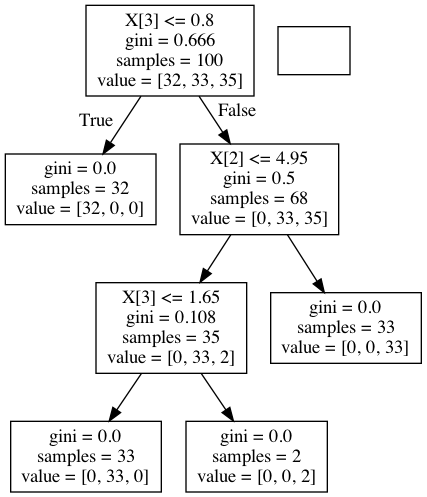

In [5]:
#viewing tree with pydotplus
import pydotplus
dot_data = tree.export_graphviz(iris_1c_tree, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("outputs/iris_1c.png")
Image("outputs/iris_1c.png", width=575, height=575)

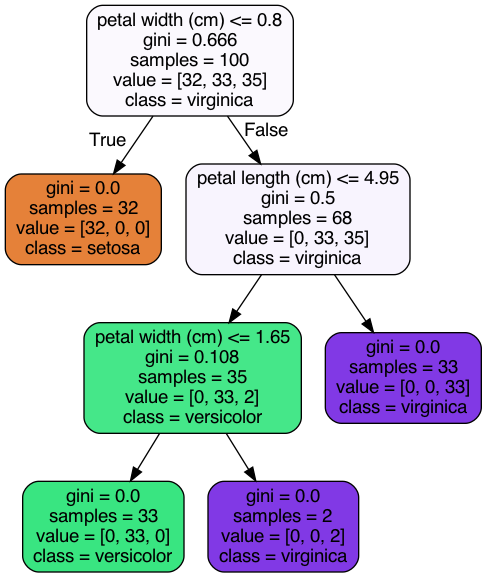

In [6]:
#viewing tree with .dot file

iris_tree = (tree.DecisionTreeClassifier()
                    .fit(iris_train_ftrs, iris_train_tgt))

with open("outputs/iris.dot", 'w') as f:
    dot_data = tree.export_graphviz(iris_tree, out_file=f,
                                    feature_names=iris.feature_names,
                                    class_names=iris.target_names,
                                    filled=True, rounded=True)
#'!' shell commands
!dot -Tpng outputs/iris.dot -o outputs/iris.png
!rm outputs/iris.dot

Image("outputs/iris.png", width=575, height=575)

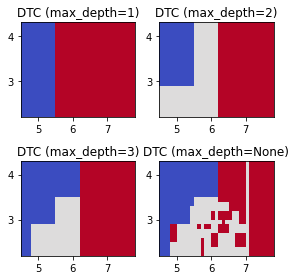

In [7]:
fig, axes = plt.subplots(2,2,figsize=(4,4))

depths = [1, 2, 3, None]
for depth, ax in zip(depths, axes.flat):
    dtc_model = tree.DecisionTreeClassifier(max_depth=depth)
    #only predicting with sepal length and width
    plot_boundary(ax, iris.data, iris.target, dtc_model, [0,1])
    ax.set_title("DTC (max_depth={})".format(dtc_model.max_depth))
    
plt.tight_layout()

#max_depth=None overfitting

## 8.3 Support Vector Classifiers

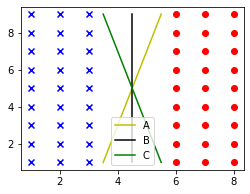

In [8]:
fig, ax = plt.subplots(1,1, figsize=(4,3))

#create cross product of points
left = np.mgrid[1:4.0, 1:10].reshape(2, -1).T
right = np.mgrid[6:9.0, 1:10].reshape(2, -1).T

#data points
ax.scatter(left[:,0], left[:,1], c='b', marker='x')
ax.scatter(right[:,0], right[:,1], c='r', marker='o')

#separating lines
ax.plot([3.5, 5.5], [1,9], 'y', label='A')
ax.plot([4.5, 4.5], [1,9], 'k', label='B')
ax.plot([3.5, 5.5], [9,1], 'g', label='C')
ax.legend(loc='lower center');

# b line is the maximum margin separator

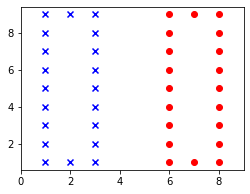

In [9]:
#boundaries of the two classes

fig, ax = plt.subplots(1, 1, figsize=(4,3))

# create cross-product of points
left = np.mgrid[1:4:2, 1:10].reshape(2, -1).T
right = np.mgrid[6:9:2, 1:10].reshape(2, -1).T

ax.scatter(left[:,0], left[:,1], c='b', marker='x')
ax.scatter([2,2], [1,9], c='b', marker='x')
ax.scatter(right[:,0], right[:,1], c='r', marker='o')
ax.scatter([7,7], [1,9], c='r', marker='o')
ax.set_xlim(0,9);

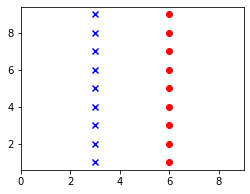

In [10]:
#really we only care about the boundaries that oppose the other class
#support vectors

fig, ax = plt.subplots(1,1, figsize=(4,3))

left = np.mgrid[3:4, 1:10].reshape(2, -1).T
right = np.mgrid[6:7, 1:10].reshape(2, -1).T

ax.scatter(left[:,0], left[:,1], c='b', marker='x')
ax.scatter(right[:,0], right[:,1], c='r', marker='o')
ax.set_xlim(0,9);

In [11]:
sv_classifiers = {"SVC(Linear)" : svm.SVC(kernel='linear'),
                  "NuSVC(Linear)" : svm.NuSVC(kernel='linear', nu=.9)}

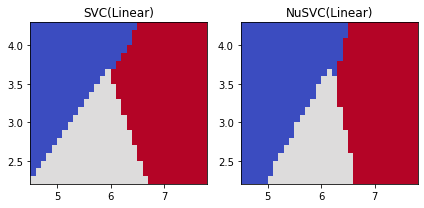

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(6,3))
for (name, mod), ax in zip(sv_classifiers.items(), axes.flat):
    plot_boundary(ax, iris.data, iris.target, mod, [0,1])
    ax.set_title(name)
    
plt.tight_layout()

### 8.3.1.2 Parameters for SVCs

In [34]:
def do_linear_svc_separators(svc_maker, pname, params, ax):
    'create svc(params) and draw separation boundary'
    #xys = (np.linspace(2, 8, 100),
     #      np.linspace(2, 8, 100))
    xs = np.linspace(2, 8, 100)
    ys = np.linspace(2, 8, 100)
    
    for p in params:
        kwargs = {pname:p, 'kernel':'linear'}
        svc = svc_maker(**kwargs).fit(ftrs, tgt)
        plot_separator(svc, xs, ys, 
                       label='{}={:g}'.format(pname, p), ax=ax)

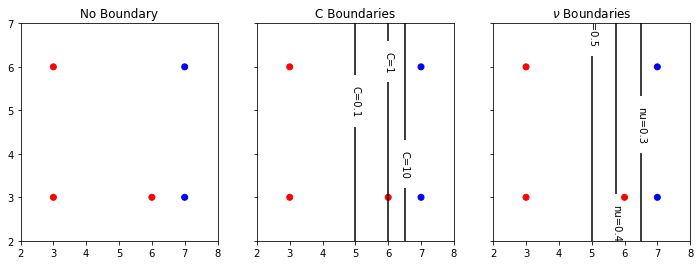

In [46]:
ftrs = np.array([[3,3],
                 [3,6],
                 [7,3],
                 [7,6],
                 [6,3]])

tgt = np.array([0,0,1,1,0])
colors = np.array(['r', 'b'])

Cs = [.1, 1.0, 10]
nus = [.3, .4, .5]

fig, axes = plt.subplots(1,3,figsize=(12,4),
                         sharex=True, sharey=True)

for ax in axes:
    ax.scatter(ftrs[:,0], ftrs[:,1], c=colors[tgt])
ax.set_xlim(2,8); ax.set_ylim(2,7)
    
# this method is not working - boundary lines aren't showing
#do_linear_svc_separators(svm.SVC, "C", Cs, axes[1])
#do_linear_svc_separators(svm.NuSVC, "nu", nus, axes[2])

for c in Cs:
    pname = "C"
    kwargs = {pname:c, 'kernel':'linear'}
    svc = svm.SVC(**kwargs).fit(ftrs, tgt)
    #plot_separator(svc, xs, ys,
    #                   labels ='{}={:g}'.format(pname, c), ax=axes[1])
    
    xs = np.linspace(2, 8, 100)
    ys = np.linspace(2, 8, 100)
    
    label ='{}={:g}'.format(pname, c)

    xy = np_cartesian_product(xs, ys)
    z_shape = (xs.size, ys.size)
    zs = svc.decision_function(xy).reshape(z_shape)
    
    contours = axes[1].contour(xs, ys, zs,
                              colors='k', levels=[0],
                              linestyles=['-'])
    fmt = {contours.levels[0] : label}
    labels = axes[1].clabel(contours, fmt=fmt, inline_spacing=10)
    [l.set_rotation(-90) for l in labels]
    

for n in nus:
    pname = "nu"
    kwargs = {pname:n, 'kernel':'linear'}
    NuSVC = svm.NuSVC(**kwargs).fit(ftrs, tgt)
    #plot_separator(svc, xs, ys,
    #                   labels ='{}={:g}'.format(pname, c), ax=axes[1])
    
    xs = np.linspace(2, 8, 100)
    ys = np.linspace(2, 8, 100)
    
    label ='{}={:g}'.format(pname, n)

    xy = np_cartesian_product(xs, ys)
    z_shape = (xs.size, ys.size)
    zs = NuSVC.decision_function(xy).reshape(z_shape)
    
    contours = axes[2].contour(xs, ys, zs,
                              colors='k', levels=[0],
                              linestyles=['-'])
    fmt = {contours.levels[0] : label}
    labels = axes[2].clabel(contours, fmt=fmt, inline_spacing=10)
    [l.set_rotation(-90) for l in labels]


axes[0].set_title("No Boundary")
axes[1].set_title("C Boundaries")
axes[2].set_title(r"$\nu$ Boundaries");



### 8.3.2 Bias and Variance in SVCs

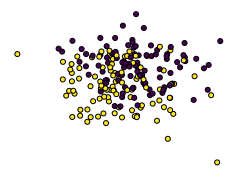

In [47]:
ftrs, tgt = datasets.make_blobs(centers=2,
                                n_features=3,
                                n_samples=200,
                                center_box=[-2.0, 2.0],
                                random_state=2727)

#note: using three features, but graphing only two dimensions
fig, ax = plt.subplots(1,1, figsize=(4,3))
ax.scatter(ftrs[:,0], ftrs[:,1],
           marker='o', c=tgt, s=25, edgecolor='k')
ax.axis('off');

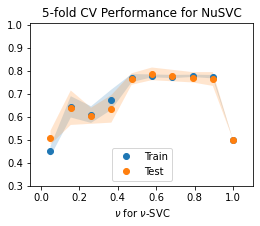

In [48]:
nus = np.linspace(0.05, 1.0, 10)
tt = skms.validation_curve(svm.NuSVC(kernel='linear'),
                           ftrs, tgt, 
                           param_name='nu',
                           param_range=nus,
                           cv=5)

fig, ax = plt.subplots(1,1, figsize=(4,3))
ax = sns.tsplot(np.array(tt).transpose(),
                time=nus,
                condition=['Train', 'Test'],
                interpolate=False)

ax.set_title('5-fold CV Performance for NuSVC')
ax.set_xlabel("\n".join([r'$\nu$ for $\nu$-SVC']))
ax.set_ylim(.3, 1.01)
ax.legend(loc='lower center');

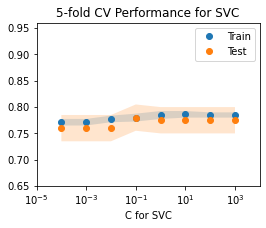

In [69]:
cs = [0.0001, 0.001, 0.01, .1, 1.0, 10, 100, 1000]

tt = skms.validation_curve(svm.SVC(kernel='linear'),
                           ftrs, tgt,
                           param_name='C',
                           param_range=cs,
                           cv=5)

fig, ax = plt.subplots(1,1,figsize=(4,3))
ax = sns.tsplot(np.array(tt).transpose(),
                time=cs,
                condition=['Train', 'Test'],
                interpolate=False)

ax.set_title('5-fold CV Performance for SVC')
ax.set_xlabel("\n".join([r'C for SVC']))
ax.set_ylim(.65, .96)
ax.set_xlim(.00001, 10001)
ax.set_xscale('log')

## 8.4 Logistic Regression

In [70]:
def simple_argmax(arr):
    ' helper to convert np.argmax into something usable'
    return np.array(np.unravel_index(np.argmax(arr),
                                     arr.shape))

def df_names(df, idxs):
    ' helper to convert number of index/column labels'
    r, c = idxs
    return df.index[r], df.columns[c]

In [71]:
base_bets = np.arange(1,12,2)
mark_bet, andy_bet = np.meshgrid(base_bets, base_bets)

mark_winnings = .1 * andy_bet + .9 * - mark_bet

df = pd.DataFrame(mark_winnings, 
                 index=base_bets,
                 columns=base_bets)

df.index.name = "Andy Bet"
df.columns.name = "Mark Bet"

print("Best Betting Scenario (for Mark) for These Values:")
print("(Andy, Mark):", df_names(df, simple_argmax(mark_winnings)))

display(df)

Best Betting Scenario (for Mark) for These Values:
(Andy, Mark): (11, 1)


Mark Bet,1,3,5,7,9,11
Andy Bet,,,,,,
1,-0.8000,-2.6000,-4.4000,-6.2000,-8.0000,-9.8000
3,-0.6000,-2.4000,-4.2000,-6.0000,-7.8000,-9.6000
5,-0.4000,-2.2000,-4.0000,-5.8000,-7.6000,-9.4000
7,-0.2000,-2.0000,-3.8000,-5.6000,-7.4000,-9.2000
9,0.0000,-1.8000,-3.6000,-5.4000,-7.2000,-9.0000
11,0.2000,-1.6000,-3.4000,-5.2000,-7.0000,-8.8000


### 8.4.2 Probabilities, Odds, and Log-Odds

In [82]:
tail_probs = [0.0, .001, .01, .05, .10, .25, 1.0/3.0]

lwr_probs = np.array(tail_probs)
upr_probs = 1-lwr_probs[::-1]
cent_prob = np.array([.5])

probs = np.concatenate([lwr_probs, cent_prob, upr_probs])

#much better than geterr/seterr/seterr
with np.errstate(divide='ignore'):
    odds = probs / (1-probs)
    log_odds = np.log(odds)
    
index = ["{:4.1f}%".format(p) for p in np.round(probs,3)*100]

polo_dict = co.OrderedDict([("Prob(E)", probs),
                            ("Odds(E:not E)", odds),
                            ("Log-Odds", log_odds)])
polo_df = pd.DataFrame(polo_dict, index=index)
polo_df.index.name = "Pct(%)"
polo_df

,Prob(E),Odds(E:not E),Log-Odds
Pct(%),,,
0.0%,0.0000,0.0000,-inf
0.1%,0.0010,0.0010,-6.9068
1.0%,0.0100,0.0101,-4.5951
5.0%,0.0500,0.0526,-2.9444
10.0%,0.1000,0.1111,-2.1972
25.0%,0.2500,0.3333,-1.0986
33.3%,0.3333,0.5000,-0.6931
50.0%,0.5000,1.0000,0.0000
66.7%,0.6667,2.0000,0.6931


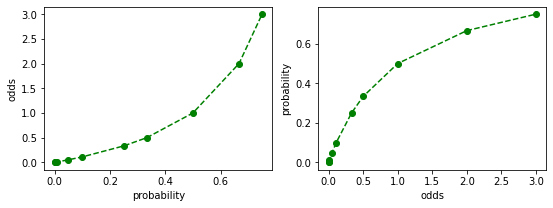

In [84]:
def helper(ax, x, y, x_name, y_name):
    ax.plot(x, y, 'g--o')
    ax.set_xlabel(x_name)
    ax.set_ylabel(y_name)
    
#note we trim the values above 90% [index -5] bc the scale of the plots
#gets too compressed (log scale fixes this)

fig, (ax0, ax1) = plt.subplots(1,2, figsize=(9,3))
helper(ax0, probs[:-5], odds[:-5], 'probability', 'odds')
helper(ax1, odds[:-5], probs[:-5], 'odds', 'probability')


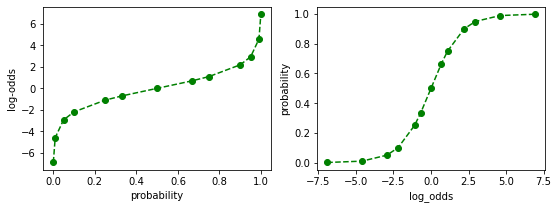

In [86]:
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(9,3))
helper(ax0, probs, log_odds, 'probability', 'log-odds')
helper(ax1, log_odds, probs, 'log_odds', 'probability')

In [89]:
pd.DataFrame([polo_df.min(axis=0),
              polo_df.max(axis=0)], index=['min', 'max']).T

,min,max
Prob(E),0.0000,1.0000
Odds(E:not E),0.0000,inf
Log-Odds,-inf,inf


In [ ]:
def logit(probs):
    odds = probs / (1-probs)
    log_odds = np.log(odds)
    return log_odds

### 8.4.3 Logistic Regression in sklearn

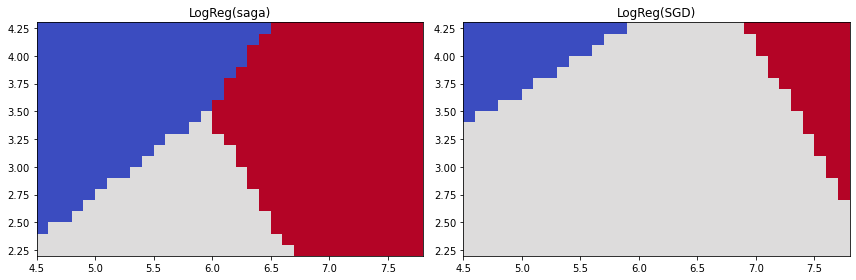

In [90]:
#Both options come with "regularization" turned ON
#Ignore for now

LogReg = linear_model.LogisticRegression
SGD = linear_model.SGDClassifier

#passing 'saga' allows use of full multiclass model vs
#wrapping binary classification w/ OvR in SGD
logreg_classifiers = {'LogReg(saga)': LogReg(solver='saga',
                                             multi_class='multinomial',
                                             max_iter=1000),
                      'LogReg(SGD)': SGD(loss='log', max_iter=1000)}

fig, axes = plt.subplots(1, 2, figsize=(12,4))
axes = axes.flat
for (name, mod), ax in zip(logreg_classifiers.items(), axes):
    plot_boundary(ax, iris.data, iris.target, mod, [0,1])
    ax.set_title(name)
plt.tight_layout()

## 8.5 Discriminant Analysis

In [120]:
#color coding
#-inf -> 0; 0 -> .5; inf -> 1
#slowly at the tails; quickly in the middle (near 0)

def sigmoid(x):
    return np.exp(-np.logaddexp(0, -x))

#to get the colors we need, we have to build a raw array with the
#correct values; we are really *drawing*
#inside a numpy array, not on the screen

def draw_rectangle(arr, pt1, pt2):
    (x1, y1), (x2, y2) = pt1, pt2
    delta_x, delta_y = x2-x1, y2-y1
    r,c = min(y1, y2), min(x1, x2) #x, y -> r, c
    # assign +/- to each block in the rectangle
    # total summation value equals area of rectangle (signed for up/down)
    arr[r:r+abs(delta_y),
       c:c+abs(delta_x)] += np.sign(delta_x * delta_y)

In [122]:
#our data points
pts = [(1,1), (3,6), (6,3)]
pt_array = np.array(pts, dtype=np.float64)

#the array we are "drawing" on:
draw_arr = np.zeros((10,10))
ct = len(pts)
c_magic = 1 / ct ** 2 #without double counting

#we use the clever don't-double-count method
for pt1, pt2 in it.combinations(pts, 2):
    draw_rectangle(draw_arr, pt1, pt2)
draw_arr *= c_magic

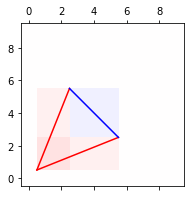

In [123]:
#display the array
from matplotlib import cm
fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.matshow(sigmoid(draw_arr), origin='lower', cmap=cm.bwr, vmin=0, vmax=1)

#show a diagonal across each rectangle
#the array elements are centered in each grid square

ax.plot([.5, 2.5], [.5, 5.5], 'r') #from 1,1 to 3,6
ax.plot([.5, 5.5], [.5, 2.5], 'r') #from 1,1 to 6,3
ax.plot([2.5, 5.5], [5.5, 2.5], 'b') #from 3,6 to 6,3

In [125]:
np_cov = np.cov(pt_array[:,0], pt_array[:,1], bias=True)[0,1]
print("Cov(x,y) - from numpy: {:4.2f}".format(np_cov))


#calculated from drawing
print("Cov(x,y) - our long way: {:4.2f}".format(draw_arr.sum()))

Cov(x,y) - from numpy: 1.22
Cov(x,y) - our long way: 1.22


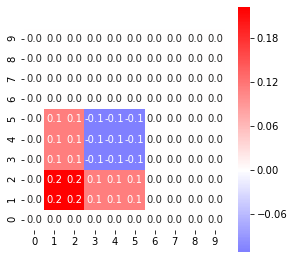

In [133]:
plt.figure(figsize=(4.5,4.5))
hm = sns.heatmap(draw_arr, center=0,
                 square=True, annot=True,
                 cmap='bwr', fmt=".1f")

hm.invert_yaxis()
hm.tick_params(bottom=True, left=True)

In [134]:
data = pd.DataFrame({'X':[1,3,6],
                     'Y':[1,6,3],
                     'Z':[10,5,1]})

data.index.name = "examples"

display(data)
display(data.cov())

,X,Y,Z
examples,,,
0,1,1,10
1,3,6,5
2,6,3,1


,X,Y,Z
X,6.3333,1.8333,-11.1667
Y,1.8333,6.3333,-5.1667
Z,-11.1667,-5.1667,20.3333


In [135]:
data = pd.DataFrame({'x':[3,6,3,4],
                     'y':[9,6,3,0],
                     'z':[1,4,7,0]})

data.index.name = 'examples'
display(data)
print("Covariance:")
display(data.cov()) #biased covariance

,x,y,z
examples,,,
0,3,9,1
1,6,6,4
2,3,3,7
3,4,0,0


Covariance:


,x,y,z
x,2.0000,0.0000,0.0000
y,0.0000,15.0000,0.0000
z,0.0000,0.0000,10.0000


Text(0, 0.5, 'values')

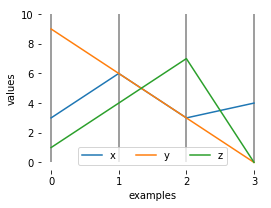

In [138]:
fig, ax = plt.subplots(1,1,figsize=(4,3))
data.plot(ax=ax)
ax.vlines([0,1,2,3], 0, 10, colors=".5")

ax.legend(loc='lower center', ncol=3)

plt.box(False)
ax.set_xticks([0,1,2,3])
ax.set_ylabel("values")

### 8.5.3 Performing DA

In [141]:
from sklearn.base import BaseEstimator, ClassifierMixin
class DLDA(BaseEstimator, ClassifierMixin):
    def __init__(self):
        pass
    
    def fit(self, train_ftrs, train_tgts):
        self.uniq_tgts = np.unique(train_tgts)
        self.means, self.priors = {}, {}
        
        self.var = train_ftrs.var(axis=0) #biased
        for tgt in self.uniq_tgts:
            cases = train_ftrs[train_tgts==tgt]
            self.means[tgt] = cases.mean(axis=0)
            self.priors[tgt] = len(cases) / len(train_ftrs)
        return self
    
    def predict(self, test_ftrs):
        disc = np.empty((test_ftrs.shape[0],
                         self.uniq_tgts.shape[0]))
        for tgt in self.uniq_tgts:
            mahalanobis_dists = ((test_ftrs - self.means[tgt])**2 / self.var)
            disc[:,tgt] = (-np.sum(mahalanobis_dists, axis =1) + 
                           2 * np.log(self.priors[tgt]))
        return np.argmax(disc, axis=1)
    
    
    

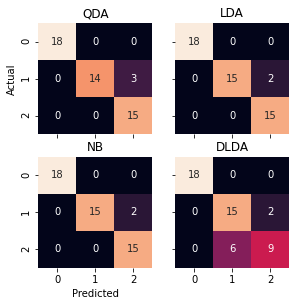

In [142]:
qda = discriminant_analysis.QuadraticDiscriminantAnalysis()
lda = discriminant_analysis.LinearDiscriminantAnalysis()
nb = naive_bayes.GaussianNB()
dlda = DLDA()

da_methods = [qda, lda, nb, dlda]
names = ["QDA", "LDA", "NB", "DLDA"]

fig, axes = plt.subplots(2,2, figsize=(4.5, 4.5),
                         sharex=True, sharey=True)

for ax, model, name in zip(axes.flat, da_methods, names):
    preds = (model.fit(iris_train_ftrs, iris_train_tgt)
                  .predict(iris_test_ftrs))
    cm = metrics.confusion_matrix(iris_test_tgt, preds)
    sns.heatmap(cm, annot=True, cbar=False, ax=ax)
    ax.set_title(name)
    
axes[0,0].set_ylabel('Actual')
axes[1,0].set_xlabel('Predicted');

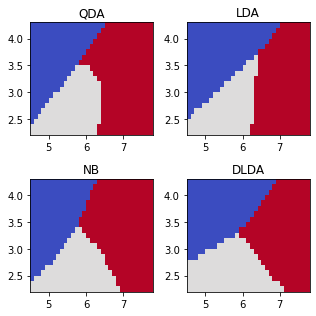

In [143]:
fig, axes = plt.subplots(2,2,figsize=(4.5,4.5))
axes = axes.flat

for model, ax, name in zip(da_methods, axes, names):
    #plot boundary only uses the specified (two) dimensions to predict
    plot_boundary(ax, iris.data, iris.target, model, [0,1])
    ax.set_title(name)
plt.tight_layout()

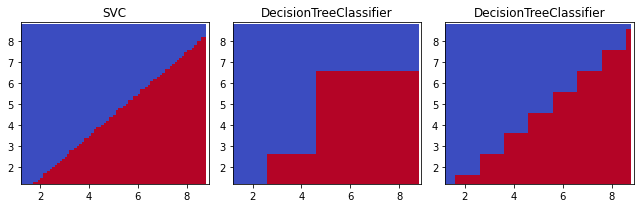

In [145]:
ftrs = np.mgrid[1:10, 1:10].T.reshape(-1,2)
tgt = ftrs[:,0] > ftrs[:,1]

fig, axes = plt.subplots(1, 3, figsize=(9,3))
axes = axes.flat

svc = svm.SVC(kernel='linear')
dt_shallow = tree.DecisionTreeClassifier(max_depth=3)
dt_deep = tree.DecisionTreeClassifier()
models = [svc, dt_shallow, dt_deep]

for model, ax in zip(models, axes):
    plot_boundary(ax, ftrs, tgt, model, [0,1])
    ax.set_title(get_model_name(model))
    
plt.tight_layout()

## 8.7 Comparison of Classifiers

In [146]:
digits = datasets.load_digits()

Shape: (8, 8)


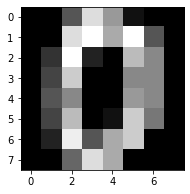

In [147]:
print("Shape:", digits.images[0].shape)
plt.figure(figsize=(3,3))
plt.imshow(digits.images[0], cmap='gray')

In [151]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [152]:
classifier_parade = \
    {'LogReg(1)': linear_model.LogisticRegression(max_iter=1000),
     'LogReg(2)': linear_model.SGDClassifier(loss='log',
                                             max_iter=1000),
    'QDA' : discriminant_analysis.QuadraticDiscriminantAnalysis(),
    'LDA' : discriminant_analysis.LinearDiscriminantAnalysis(),
    'GNB' : naive_bayes.GaussianNB(),
    
    'SVC(1)' : svm.SVC(kernel="linear"),
    'SVC(2)' : svm.LinearSVC(),
    
    'DTC' : tree.DecisionTreeClassifier(),
    '5NN-C' : neighbors.KNeighborsClassifier(),
    '10NN-C' : neighbors.KNeighborsClassifier(n_neighbors=10)}

baseline = dummy.DummyClassifier(strategy='uniform')

base_score = skms.cross_val_score(baseline,
                                  digits.data, digits.target==1,
                                  cv=10, scoring='average_precision',
                                  n_jobs=-1)

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


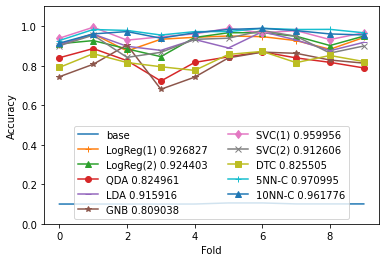

In [153]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(base_score, label='base')

for name, model in classifier_parade.items():
    cv_scores = skms.cross_val_score(model,
                                     digits.data, digits.target,
                                     cv=10,
                                     scoring='f1_macro',
                                     n_jobs = -1) #all CPUs
    my_lbl = "{} {:3f}".format(name, cv_scores.mean())
    ax.plot(cv_scores, label=my_lbl, marker=next(markers))
    
ax.set_ylim(0.0,1.1)
ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy')
ax.legend(loc='lower center', ncol=2);